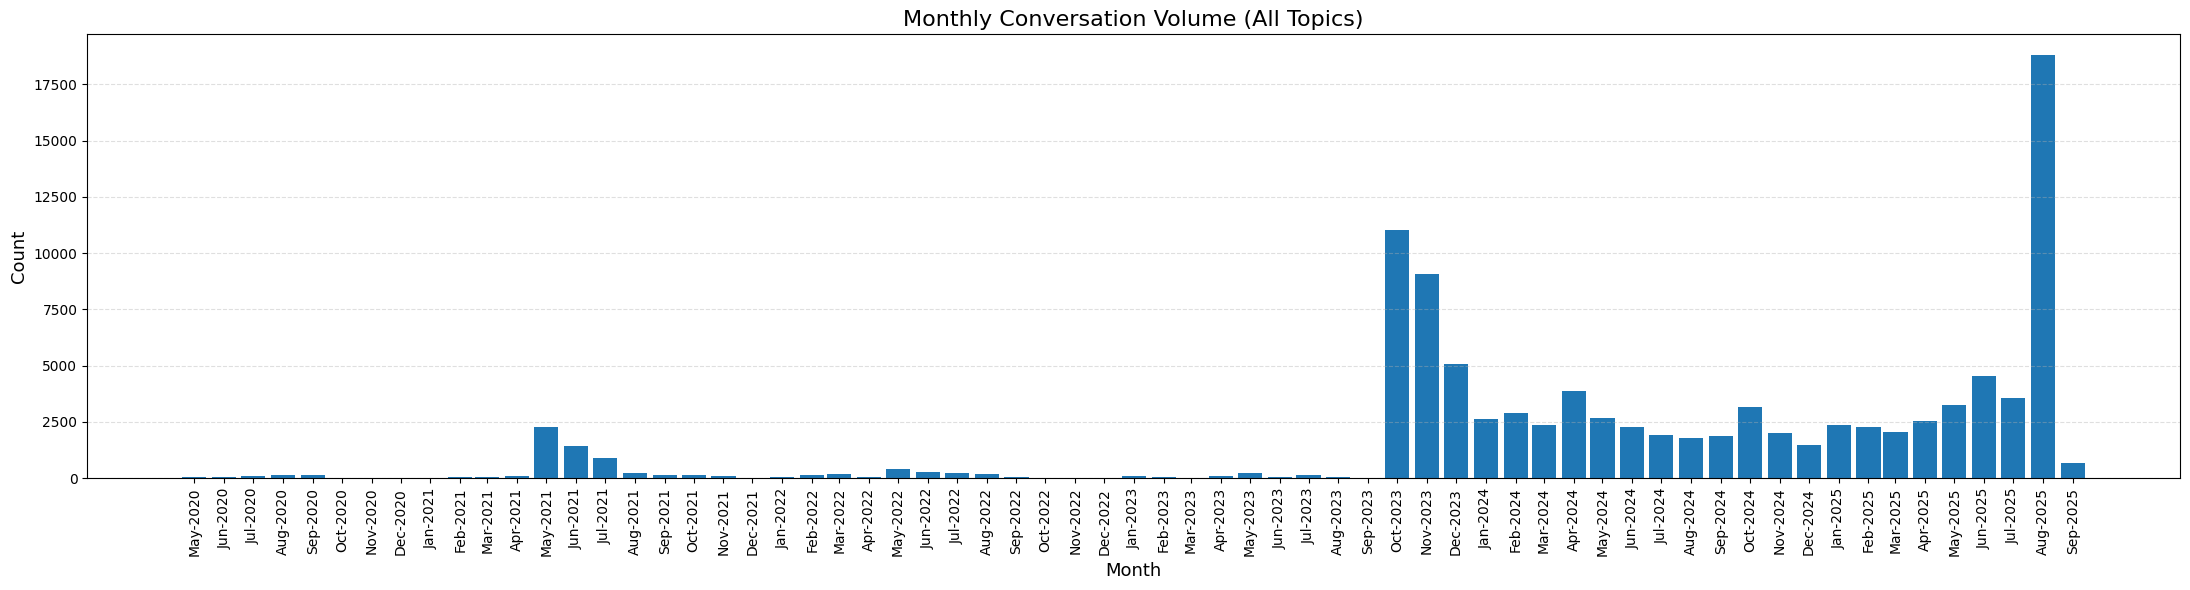

In [ ]:

#Step 11

# - Topic trends CSV has:
#    - a column 'date' with the time index
#    - one column per topic (e.g. 'topic_0', 'topic_1', ...) or any column names you choose.
# - Event timeline file (CSV or XLSX) has at least:
#    - a date column (e.g. 'date' or 'Date')
#    - a short description column (e.g. 'event' or 'Description')
#    - optional 'end_date' column for intervals

# BARchart of count of all 30 topics 
# change between weeklt and monthly 


import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Path to weekly trends file
CSV_PATH = Path("results/top10_topic_trends_monthly_mts30_topic0.csv") #change between weekly and monthly 

# Date range to display
START_DATE = "2021-01-01"
END_DATE   = "2025-09-01"

# Load the dataset
df = pd.read_csv(CSV_PATH, sep=";")

# Aggregate counts across all topics for each week or month 
monthly = (
    df.groupby("time_bin", as_index=False)["count"]
      .sum()
      .rename(columns={"time_bin": "date"})
)

# Convert to datetime and filter range
monthly["date"] = pd.to_datetime(monthly["date"])
mask = (monthly["date"] >= START_DATE) & (monthly["date"] <= END_DATE)
weekly = monthly.loc[mask].sort_values("date")


plt.figure(figsize=(22, 6))

# Bar chart of weekly/monthly totals
plt.bar(monthly["date"], monthly["count"], width=25)  # ~1 month width

plt.title("Monthly Conversation Volume (All Topics)", fontsize=16)
plt.xlabel("Month", fontsize=13)
plt.ylabel("Count", fontsize=13)
plt.grid(axis="y", linestyle="--", alpha=0.4)

# Format x-axis to show month names
plt.xticks(
    monthly["date"],
    monthly["date"].dt.strftime("%b-%Y"),   # e.g. "Jan-2021"
    rotation=90
)

plt.tight_layout()
plt.show()




WindowsPath('results/conversation_volume_monthly.png')

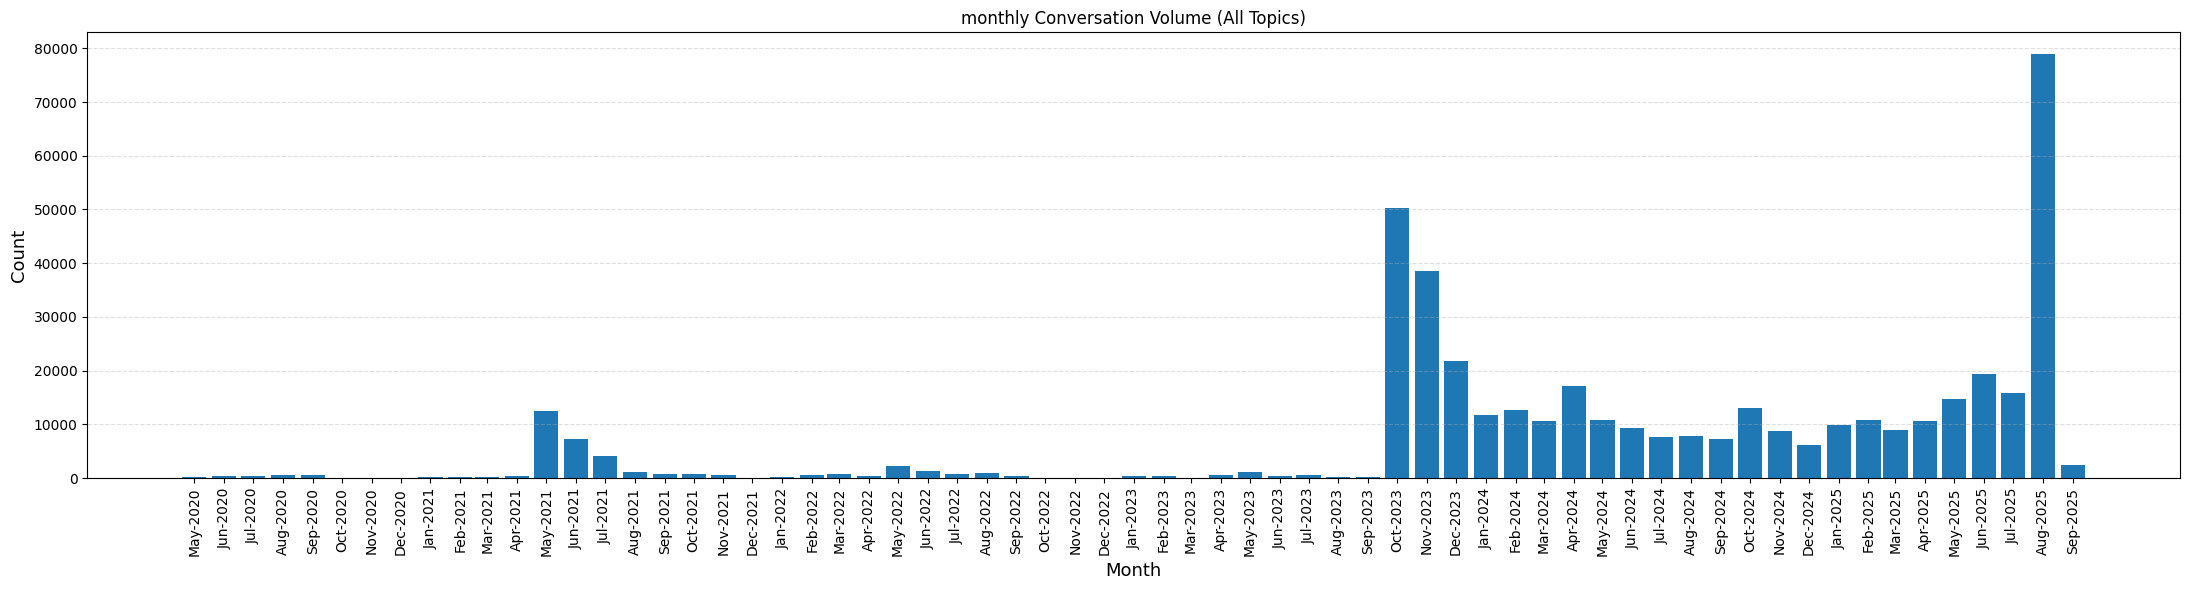

In [17]:
output_path = Path("results/conversation_volume_monthly.png")
plt.figure(figsize=(22, 6))
plt.bar(monthly["date"], monthly["count"], width=25)
plt.title("monthly Conversation Volume (All Topics)")
plt.xlabel("Month", fontsize = 13)
plt.ylabel("Count", fontsize =13)
plt.grid(axis="y", linestyle="--", alpha=0.4)

# Format x-axis to show month names (outcomment for weekly)
plt.xticks(
    monthly["date"],
    monthly["date"].dt.strftime("%b-%Y"),   # e.g., Jan-2021
    rotation=90
)

plt.tight_layout()
plt.savefig(output_path, dpi=200)

output_path


In [8]:
# Define zoom windows for weekly analysis 
ZOOM_WINDOWS = [
    ("2021-05-01", "2021-08-31", "Conversation during 2021 conflict flare-up"),
    ("2023-10-01", "2025-09-01", "Conversation from late 2023 to latest data"),
]

ZOOM_WINDOWS


[('2021-05-01', '2021-08-31', 'Conversation during 2021 conflict flare-up'),
 ('2023-10-01', '2025-09-01', 'Conversation from late 2023 to latest data')]

In [9]:
# Load the WEEKLY dataset again specifically for zooming
weekly_path = Path("results/top10_topic_trends_weekly_mts30_topic0.csv")
weekly_df = pd.read_csv(weekly_path, sep=";")

weekly_df = (
    weekly_df.groupby("time_bin", as_index=False)["count"]
             .sum()
             .rename(columns={"time_bin": "date"})
)

weekly_df["date"] = pd.to_datetime(weekly_df["date"])

# Filter the weekly range
weekly_df = weekly_df[
    (weekly_df["date"] >= "2021-01-01") &
    (weekly_df["date"] <= "2025-09-01")
].sort_values("date")


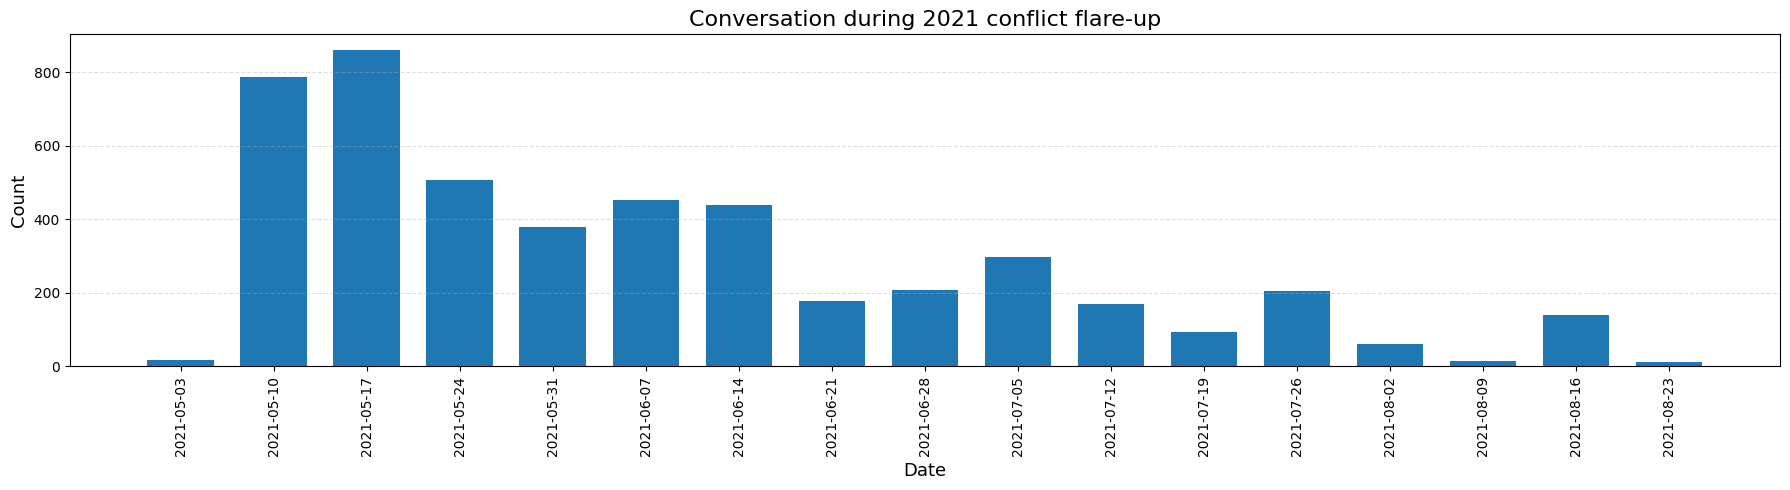

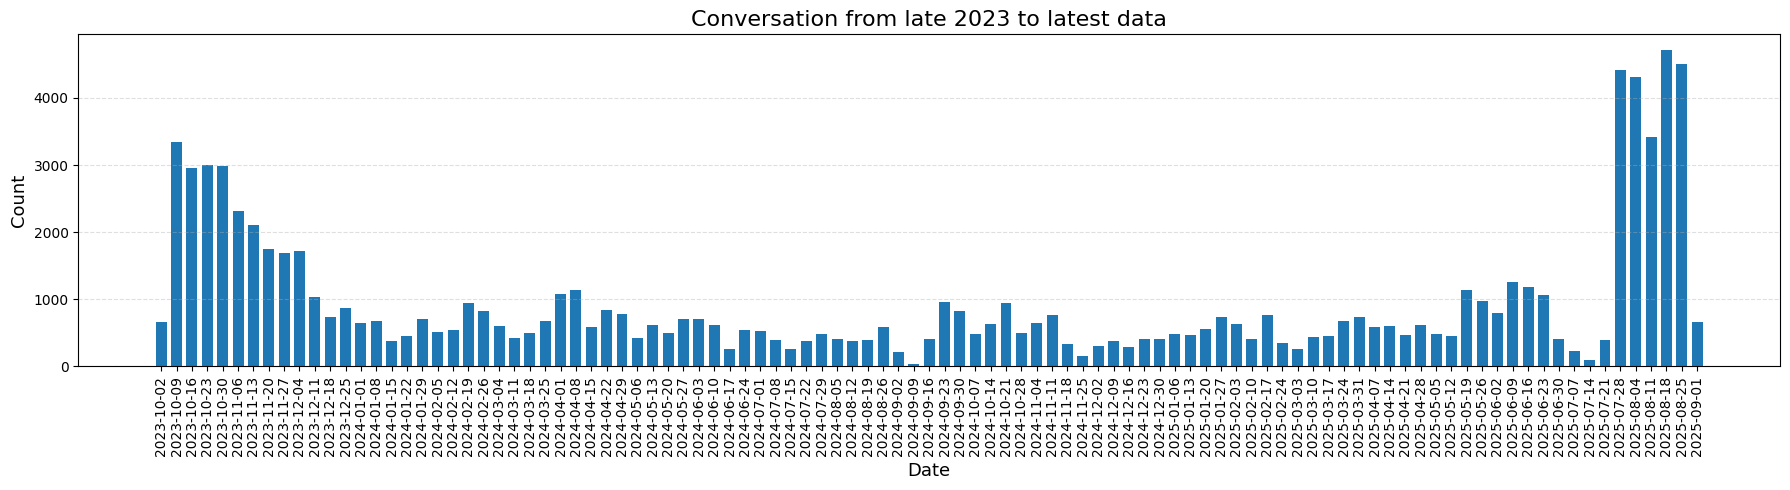

In [10]:
import matplotlib.pyplot as plt
from pathlib import Path

for start_date, end_date, title in ZOOM_WINDOWS:
    # Filter weekly data for this window
    zoom = weekly_df[(weekly_df["date"] >= start_date) & (weekly_df["date"] <= end_date)]

    plt.figure(figsize=(18, 5))
    plt.bar(zoom["date"], zoom["count"], width=5)

    plt.title(title, fontsize=16)
    plt.xlabel("Date", fontsize=13)
    plt.ylabel("Count", fontsize=13)
    plt.grid(axis="y", linestyle="--", alpha=0.4)

    # Add date labels on x-axis (one per week)
    plt.xticks(
        zoom["date"],
        zoom["date"].dt.strftime("%Y-%m-%d"),
        rotation=90
    )

    plt.tight_layout()
   

results_dir = Path("results")
results_dir.mkdir(exist_ok=True)



